In [9]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Introduction

Get 2nd order equations of the HQ curves (Heart Mate III) for different RPMs. 



<img src="../res/HQ-curve-HMIII.png" width="60%"/>

# Curve coefficients

#### Report data points


In [8]:
# Dictionnary: RPM [int] -> data [list of xs [list] and ys[list] ]
# x = Q, y = P
data = {}

In [116]:
data[3000] = [
    [0.0, 1.0, 2.0, 2.9], # flow
    [32,  29, 23, 14],   # pressure
]

In [120]:
data[4000] = [
    [0.0, 2.0, 3.0, 4.5],
    [58,  49,  41,  16]
]

In [73]:
data[5000] = [
    [0.0, 2.0, 4.0, 6.0],
    [90,  80,  63,  19]
]

In [90]:
data[6000] = [
    [0.0, 2.0, 4.0, 6.0, 7.0, 7.4],
    [131, 120, 105, 70,  36,  22]
]

In [87]:
data[7000] = [
    [0.0, 2.0, 4.0, 5.0, 8.0],
    [177, 168, 150, 140, 63]
]

In [132]:
data[8000] = [
    [0.0, 2.0, 3.0, 5.0, 6.0, 8.0, 10.0],
    [232, 220, 211, 191, 178, 126, 43]
]

In [129]:
data[9000] = [
    [0.0, 2.0, 4.0, 6.0, 9.0, 10.0, 11.0],
    [290, 278, 263, 240, 164, 125,  72]
]

## Fit polynomials

#### Demo

[ 1.22017354  0.11388286 -0.0835141 ]


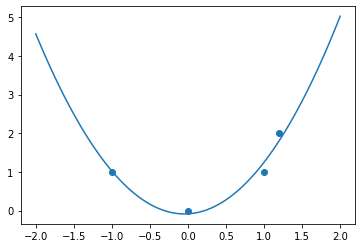

In [44]:
# Demo numpy.polyfit: f(x)=x^2
x = [-1,0,1, 1.2]
y = [1,0,1, 2]
coefs = np.polyfit(x, y, 2)
coefs # order: x^n, x^n-1, ..., x^1, x^0
print(coefs)
plt.scatter(x, y)
x = np.linspace(-2, 2, 100)
plt.plot(x, np.polyval(coefs, x));

#### Compute coefficients

In [136]:
coefs = {}
coefs_rev = {}
for k in data:
    x = data[k][0]
    y = data[k][1]
    coefs[k] = np.polyfit(x, y, deg=2)
    coefs_rev[k] = np.polyfit(y, x, deg=2)

In [139]:
coefs

{3000: array([-1.78323824, -0.99446946, 31.94514865]),
 4000: array([-2.14396585,  0.43053939, 57.7991851 ]),
 5000: array([-2.125,  1.25 , 89.   ]),
 6000: array([ -2.32374321,   3.20314536, 128.44636301]),
 7000: array([ -1.98918136,   2.01115938, 175.32174802]),
 8000: array([ -2.17595432,   4.02664693, 225.99587607]),
 9000: array([ -2.1059641 ,   4.72789543, 283.90907692])}

In [140]:
coefs_rev

{3000: array([-0.00732323,  0.18055556,  1.79318182]),
 4000: array([-2.92820452e-03,  1.10902457e-01,  3.46625704e+00]),
 5000: array([-1.47566667e-03,  7.78068193e-02,  5.04487122e+00]),
 6000: array([-7.29157115e-04,  4.91629541e-02,  6.42129744e+00]),
 7000: array([-8.23211969e-04,  1.29666136e-01,  3.08846639e+00]),
 8000: array([-3.31876339e-04,  4.23020869e-02,  8.62874940e+00]),
 9000: array([-2.57495930e-04,  4.83148895e-02,  8.47073519e+00])}

#### HQ plot

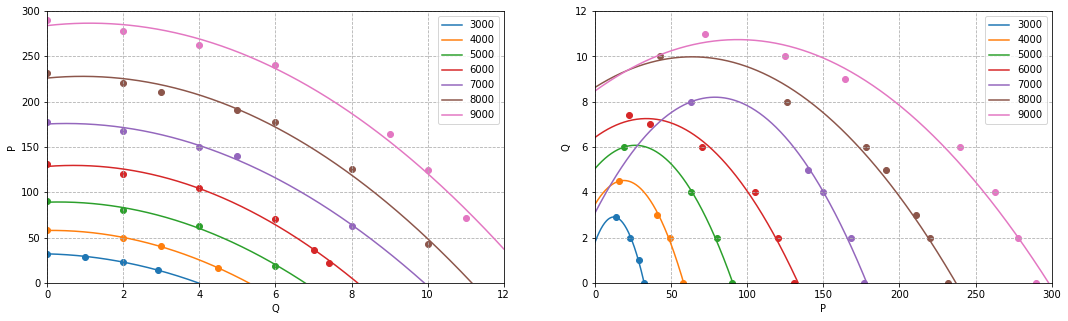

In [152]:
fig,ax = plt.subplots(1,2,figsize=(18, 5))
Q = np.linspace(0, 12, 1000)
P = np.linspace(0, 300, 1000)
for k,poly in coefs.items():
    ax[0].scatter(data[k][0], data[k][1])
    ax[0].plot(Q, np.polyval(poly, Q), label=k)
    ax[1].scatter(data[k][1], data[k][0])
    ax[1].plot(P, np.polyval(coefs_rev[k], P), label=k)
    
ax[0].set_xlim(0,12); ax[0].set_ylim(0,300)
ax[0].grid(ls='--'); ax[0].legend();
ax[0].set_xlabel("Q"); ax[0].set_ylabel("P");
ax[1].set_xlim(0,300); ax[1].set_ylim(0,12)
ax[1].grid(ls='--'); ax[1].legend();
ax[1].set_xlabel("P"); ax[1].set_ylabel("Q");

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />